In [1]:
# convert three-letter to one-letter amino acid symbols:

aa_3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S',
'GLN': 'Q', 'LYS':'K','ILE': 'I', 'PRO': 'P',
 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 'GLY': 'G',
 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W',
 'ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
 

In [2]:
import pandas as pd
nu_df = pd.read_csv('aa_freq.csv', sep=',',header=0)
# replace NA's with 0's
nu_df.fillna(0,inplace=True)




In [3]:
nu_df

,Overtone,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,Ala(A),60,222,235,268,331,417,492,560,635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cys(C),53,101,178,206,249,276,338,429,485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Asp(D),45,70,87,154,239,291,335,365,441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Glu(E),20,41,65,102,112,215,240,245,309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phe(F),29,54,58,94,181,241,290,295,315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Gly(G),66,240,290,455,544,603,707,833,853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,His(H),27,74,80,127,219,276,309,323,343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Ile(I),52,59,82,149,216,224,256,277,290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Lys(K),43,61,63,86,135,150,187,227,243,...,3565.0,3745.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Leu(L),14,39,100,139,226,239,245,259,299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
from scipy.constants import speed_of_light as speedlight
nu = nu_df.values

In [5]:
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if co == 0:
            aa = nu[ro][co]
            aa = aa[0:3].upper()
            nu[ro][co]= aa_3to1[aa]
        else:
        # Convert from wavenumber to frequency
        # wavelength = 1/wavenumber
        # frequency = speed of light / wavelength
            if nu[ro][co] > 0:
                freq = speedlight / (1/nu[ro][co])

In [6]:
aa_list = nu[:,0]      # list of amino acids
nu = nu[:,1:]          # remove first column                
max_freq = nu.max()    # max and min 
min_freq = nu.min()    # need to exclude first column
human_range = 20000 - 20
for ro in range(nu.shape[0]):
    for co in range(nu.shape[1]):
        if nu[ro][co] > 0:
            # First scale to 0 to 1
            nu[ro][co] = (nu[ro][co] - min_freq)/ max_freq - min_freq
            # Scale to human hearing range 20 - 20000 Hz
            nu[ro][co] = (nu[ro][co] * human_range) + 20

In [7]:
def aa_note(aa,length):
    row = np.where(aa_list == aa)[0][0]
    print(row)
    wave = np.zeros(int(44100 * float(length)))
    harm = 0
 
    for freq in nu[row]:
        if freq == 0:
            break
        else:
            volume = np.exp(-harm)
            phases = np.cumsum(2.0 * np.pi * freq / 44100 * np.ones(int(44100 * float(length))))
            wave += np.sin(phases) * volume
            harm += 1
    # scale wave to values between 1 and -1
    wave = 2.*(wave - wave.min())/np.ptp(wave)-1
    return wave

In [8]:
from synthesizer import Player, Synthesizer
player = Player()
player.open_stream()

In [9]:

file_coronaviral ="./seq/anticoronavirus.csv"
file_antiviral ="./seq/antiviral.csv"
file_randomviral ="./seq/random-seq-non-antiviral.csv"
file_expoviral ="./seq/expnonantiviral.csv"

In [34]:
# df = pd.read_csv(file_coronaviral, sep=',',header=0)
# df.drop('label',axis=1)
# df['sequence'].to_csv(file_coronaviral,index=False,header=False)    

# df = pd.read_csv(file_antiviral, sep=',',header=0)
# df.drop('label',axis=1)
# df['sequence'].to_csv(file_antiviral,index=False,header=False)    

# df = pd.read_csv(file_randomviral, sep=',',header=0)
# df.drop('label',axis=1)
# df['sequence'].to_csv(file_randomviral,index=False,header=False)    

# df = pd.read_csv(file_expoviral, sep=',',header=0)
# df.drop('label',axis=1)
# df['sequence'].to_csv(file_expoviral,index=False,header=False)    




In [10]:
df = pd.read_csv(file_coronaviral, sep=',',header=0)
df

,KTCENLADTFRGPCFATSNC
0,GLFVGVLAKVAAHVVPAIAEHF
1,GIGKFLHSAGKFGKAFVGEIMKS
2,GIGKFLHSAKKFGKAFVGEIMNS
3,GEGFLGMLLHGVGHAIHGLIHGK
4,GLRSKIWLWVLLMIWQESNKFKKM
...,...
103,GRLQSLQTYVTQQLIRAAEIRASANLAATKMSEC
104,KEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYVW
105,LFGLIPSLIGGLVSAFK
106,LFRLIKSLIKRLVSAFK


In [11]:
# Python program to read CSV file line by line
# import necessary packages
import csv
import numpy as np
import pandas as pd
all_melodies=[]

# df = pd.read_csv('Comnined_datasets_sequences.csv')    
# df



# Open file 
with open(file_coronaviral) as file_obj:
# with open('Comnined_datasets_sequences.csv') as file_obj:
    # Create reader object by passing the file object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv file using reader object
    count = 0
    for row in reader_obj:
        if count==0:
            pass
        protein_sequence = str(row)
        unit_length = 0.5
        melodic_sequence = []
        for residue in protein_sequence:
            if residue!='[' and residue!="'" and residue!="]":
                sound_wave = aa_note(residue,unit_length)
                melodic_sequence = melodic_sequence + sound_wave.tolist()
        melody = np.asarray(melodic_sequence)
        melody = 2*(melody - melody.min())/np.ptp(melody)-1
        all_melodies.append(melody)
        count+=1

    

8
16
1
3
11
9
0
2
16
4
14
5
12
1
4
0
16
15
11
1
5
9
4
17
5
17
9
0
8
17
0
0
6
17
17
12
0
7
0
3
6
4
5
7
5
8
4
9
6
15
0
5
8
4
5
8
0
4
17
5
3
7
10
8
15
5
7
5
8
4
9
6
15
0
8
8
4
5
8
0
4
17
5
3
7
10
11
15
5
3
5
4
9
5
10
9
9
6
5
17
5
6
0
7
6
5
9
7
6
5
8
5
9
14
15
8
7
18
9
18
17
9
9
10
7
18
13
3
15
11
8
4
8
8
10
4
9
12
17
9
0
5
7
0
0
8
17
17
12
0
9
4
1
8
7
16
8
8
1
5
18
5
15
4
4
8
8
0
0
6
17
5
8
6
17
5
8
0
0
9
16
6
19
9
4
4
5
18
9
7
14
5
0
7
6
0
5
8
0
7
6
5
9
7
6
14
14
14
6
0
9
18
10
16
9
9
8
8
17
9
8
0
0
0
8
0
0
9
11
0
17
9
17
5
0
11
0
5
9
12
17
1
5
3
16
1
17
5
5
16
1
11
16
12
5
1
16
1
15
18
12
17
1
16
14
11
5
0
4
5
11
4
9
8
5
17
0
8
8
0
5
9
8
7
9
15
7
0
13
1
8
9
15
5
16
1
5
18
4
8
8
0
18
14
8
17
8
11
0
5
14
14
17
9
8
5
17
5
7
6
19
5
17
5
9
7
5
15
17
9
11
1
5
3
16
1
9
9
5
16
1
19
16
16
5
1
16
1
11
8
19
14
17
1
16
8
2
14
14
1
7
1
16
16
14
16
1
14
4
12
19
14
14
9
5
16
1
7
4
13
11
14
17
19
16
4
1
1
0
1
19
1
14
7
5
0
1
17
15
5
3
14
9
16
5
0
1
5
9
11
5
14
7
19
14
9
1
1
14
5
17
7
12
1
5
3
15
1
17
4

In [13]:
!pip install ffmpeg
from os import path
from pydub import AudioSegment
# converting all music into wav format

from __future__ import print_function
import scipy.io.wavfile as wavf
import numpy as np
i=0
fs = 441
for melody in all_melodies:
    out_f = 'input/anti-coronavirus/'+str(i)+'.wav'
    wavf.write(out_f, fs, all_melodies[i])
    i=i+1



In [14]:
# Python program to read CSV file line by line
# import necessary packages
import csv
import numpy as np
import pandas as pd
all_melodies=[]

# df = pd.read_csv('Comnined_datasets_sequences.csv')    
# df



# Open file 
with open(file_antiviral) as file_obj:
# with open('Comnined_datasets_sequences.csv') as file_obj:
    # Create reader object by passing the file object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv file using reader object
    count = 0
    for row in reader_obj:
        if count==0:
            pass
        protein_sequence = str(row)
        unit_length = 0.5
        melodic_sequence = []
        for residue in protein_sequence:
            if residue!='[' and residue!="'" and residue!="]":
                sound_wave = aa_note(residue,unit_length)
                melodic_sequence = melodic_sequence + sound_wave.tolist()
        melody = np.asarray(melodic_sequence)
        melody = 2*(melody - melody.min())/np.ptp(melody)-1
        all_melodies.append(melody)
        count+=1

    

2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
6
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
15
10
8
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
9
6
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
0
8
3
9
9
3
15
15
2
13
7
9
14
15
10
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
9
16
15
8
17
9
2
9
8
11
19
7
2
8
13
0
17
15
8
17
9
6
9
3
5
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
17
15
17
3
17
11
8
7
0
9
9
15
16
11
8
0
17
17
15
9
15
11
5
1

9
13
13
15
8
2
19
7
8
3
0
13
8
7
9
2
16
17
8
17
2
7
15
15
13
7
15
15
10
11
13
15
9
13
13
15
8
2
19
7
8
3
0
13
14
9
9
2
16
17
11
12
15
9
16
15
13
11
7
14
15
0
3
12
3
14
14
11
7
8
19
9
0
7
12
1
5
3
15
1
17
18
7
12
1
7
15
0
0
7
5
1
15
1
8
11
8
17
1
19
14
0
8
7
16
4
16
11
11
6
12
14
16
7
18
12
1
5
3
15
1
0
10
7
15
4
1
4
16
3
17
7
5
1
15
1
8
11
8
17
1
19
9
11
15
7
15
1
5
3
15
1
17
4
7
12
1
7
16
15
17
0
5
1
15
1
8
15
8
17
1
19
14
11
5
7
12
1
5
15
17
4
9
17
5
13
9
4
16
4
15
12
14
6
6
1
9
5
17
5
15
1
11
2
4
0
5
1
5
19
0
7
17
1
4
18
2
1
12
11
5
12
18
17
18
17
12
0
4
1
13
0
17
5
18
5
2
14
3
7
11
11
19
16
15
9
7
6
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
3
3
9
0
8
8
0
3
3
9
0
8
8
0
3
3
9
0
8
8
0
3
3
9
0
8
8
0
18
0
15
9
18
11
18
4
3
18
2
14
3
7
11
11
19
16
15
9
7
6
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
4
8
1
14
14
18
13
18
14
10
4
8
14
7
17
13
14
7
8
2
4
9
14
5
0
2
4
13
3
1
10
8
3
6
15
13
8
13
6
13
6
13
5
5
2
12
16
4
1
5
3
16
1
14
17
7
12
17
1
16
19
15
0
0
9
5
1
16
1


4
19
16
15
9
7
6
15
9
7
3
13
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
15
9
18
11
18
4
19
16
15
9
7
6
15
9
7
13
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
15
9
18
11
18
4
19
16
15
9
7
13
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
3
9
9
3
9
2
8
18
0
15
9
18
11
18
4
19
16
15
9
7
13
15
9
7
3
3
15
13
11
13
13
3
8
11
3
13
13
9
9
3
9
2
8
18
0
15
9
18
11
18
4
0
9
18
8
16
10
9
8
8
9
5
16
10
0
9
6
0
5
8
0
0
9
5
0
0
0
2
16
7
15
13
5
16
13
5
9
4
5
17
9
0
8
17
0
0
6
17
17
12
0
7
0
3
6
4
5
9
9
15
17
9
5
15
17
0
8
6
17
9
12
6
17
17
12
17
7
0
3
6
9
1
5
14
9
9
9
14
14
13
14
14
14
0
6
13
11
3
18
14
8
8
14
19
15
16
13
17
4
4
5
8
17
9
8
9
7
14
8
7
4
4
4
6
6
7
4
14
5
7
17
6
17
5
8
16
7
6
14
9
17
16
5
5
4
8
2
9
9
8
5
0
0
8
0
9
17
8
16
17
9
4
5
4
9
2
7
7
3
8
7
0
8
15
18
5
4
9
15
7
9
8
8
17
9
12
8
17
10
0
6
10
8
5
4
11
3
7
17
13
2
7
3
2
4
9
13
11
9
17
5
7
5
0
17
9
8
17
9
16
16
5
9
12
0
9
7
15
18
7
8
14
8
14
13
13
5
7
7
2
7
0
8
8
9
4
3
15
18
5
7
18
2
16
7
8
15
10
5
8
17
4
0
5
8
7
9
13
11
9
5
7
18
15
2
9
0

15
7
5
11
11
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
11
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
1
0
16
1
3
13
7
0
2
15
13
6
14
15
6
14
13
10
17
1
0
16
1
13
7
0
2
15
6
14
15
6
14
13
10
17
12
12
18
1
1
1
15
12
10
8
14
0
15
12
12
12
0
13
15
2
9
12
0
16
12
8
1
12
12
14
14
8
8
0
0
17
0
9
9
12
0
17
9
9
0
9
9
0
12
14
14
8
8
0
17
9
9
0
9
9
0
12
14
14
8
8
9
12
0
17
9
9
0
9
9
0
12
14
14
8
8
12
0
17
9
9
0
9
9
0
12
14
14
8
8
17
9
9
0
9
9
0
12
14
14
8
8
0
0
17
0
9
9
0
17
9
9
0
9
9
0
14
14
8
8
17
0
9
9
0
17
9
9
0
9
9
0
5
9
9
14
8
5
5
3
8
7
5
3
8
9
8
8
7
5
13
8
7
8
11
4
4
13
8
9
17
12
13
12
3
13
14
8
0
17
9
9
0
9
9
0
14
8
8
9
0
17
9
9
0
9
9
0
14
14
8
8
0
0
0
0
0
0
0
0
0
14


16
18
3
0
18
2
14
0
7
0
3
19
0
0
14
7
3
0
9
7
14
0
15
13
3
13
13
3
8
11
3
0
3
9
14
3
9
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
15
16
16
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
15
16
0
0
6
9
7
2
0
9
19
0
3
4
9
5
5
14
17
9
16
16
6
14
18
14
8
14
18
14
8
6
14
18
14
8
14
18
14
8
8
14
18
14
8
14
18
14
8
18
14
18
14
8
14
18
14
8
14
16
14
8
14
5
14
8
14
16
14
8
14
5
14
8
14
5
5
8
7
0
5
8
7
0
8
7
0
5
8
7
0
8
7
0
5
8
7
0
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
14
15
11
13
8
9
2
15
7
5
11
18
6
13
15
14
14
8
8
0
0
17
0
9
9
12
0
17
9
9
0
14
14
8
8
0
0
17
0
9
9
12
0
17
9
9
0
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
2
0
8
3
9
9
3
15
15
2
13
7
6
14
7
2
9
5
12
12
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
2
0
8
3
9
9
3
7
15
9
3
14
9
2
17
5
16
11
9
5
11
0
7
0
8
9
3
2
0
8
3
9
9
3
15
15
2
13
7
9
14
15
1
5
3
1
5
5
5
6
7
17
5
14
4
1
10
17
17
14
4
9
14
9
17
4
7
1
14
1
1
3
9
8
15
9
1
12
16
9
10
14
17
17
14
9


In [15]:
from os import path
from pydub import AudioSegment
# converting all music into wav format

from __future__ import print_function
import scipy.io.wavfile as wavf
import numpy as np
i=0
fs = 441
for melody in all_melodies:
    out_f = 'input/antiviral/'+str(i)+'.wav'
    wavf.write(out_f, fs, all_melodies[i])
    i=i+1



In [16]:
# Python program to read CSV file line by line
# import necessary packages
import csv
import numpy as np
import pandas as pd
all_melodies=[]

# df = pd.read_csv('Comnined_datasets_sequences.csv')    
# df



# Open file 
with open(file_randomviral) as file_obj:
# with open('Comnined_datasets_sequences.csv') as file_obj:
    # Create reader object by passing the file object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv file using reader object
    count = 0
    for row in reader_obj:
        if count==0:
            pass
        protein_sequence = str(row)
        unit_length = 0.5
        melodic_sequence = []
        for residue in protein_sequence:
            if residue!='[' and residue!="'" and residue!="]":
                sound_wave = aa_note(residue,unit_length)
                melodic_sequence = melodic_sequence + sound_wave.tolist()
        melody = np.asarray(melodic_sequence)
        melody = 2*(melody - melody.min())/np.ptp(melody)-1
        all_melodies.append(melody)
        count+=1

    

11
9
4
15
0
9
15
9
2
16
18
17
9
6
11
5
12
0
6
18
6
3
6
4
12
7
0
11
5
3
14
13
15
12
7
0
9
9
0
17
15
9
7
9
9
19
9
19
5
16
14
16
6
5
9
4
8
8
9
11
9
5
12
12
15
4
12
6
6
14
0
16
9
14
9
15
3
8
9
9
19
16
1
9
9
18
9
9
15
15
5
9
18
16
17
13
0
10
2
12
11
0
0
19
10
11
16
15
14
6
6
14
17
9
0
2
14
17
8
18
16
14
15
15
0
0
8
14
0
0
1
9
17
0
0
0
19
0
9
8
16
9
19
12
7
7
5
8
14
9
8
13
15
5
6
10
4
17
16
2
4
14
8
3
4
19
3
16
17
6
11
13
14
17
9
9
4
17
0
15
2
17
2
11
0
13
10
15
3
2
15
6
15
15
15
17
14
15
13
11
0
9
4
9
17
0
9
9
0
4
9
15
9
5
15
5
1
6
6
14
9
1
6
1
15
11
5
17
4
9
1
13
2
15
9
9
17
1
9
16
17
10
17
9
10
15
17
18
13
13
14
8
15
8
5
8
9
12
5
8
17
7
8
1
8
0
0
17
9
18
3
0
11
8
12
4
15
9
3
3
17
3
17
0
12
12
8
0
6
3
17
14
7
8
7
17
0
16
7
8
1
14
0
0
17
9
18
3
8
11
8
12
4
15
7
3
3
17
3
17
0
12
12
8
0
19
3
2
2
14
3
2
9
17
19
13
0
8
9
0
3
3
6
17
15
15
15
3
3
12
7
11
7
4
13
3
7
19
8
13
3
8
11
10
0
7
6
12
14
8
3
17
19
14
4
4
16
14
9
5
13
7
19
13
15
18
9
2
8
15
16
12
19
16
0
12
5
6
13
9
2
2
7
12
15
16
11
17
19


4
6
12
13
13
4
13
19
16
9
2
9
9
9
9
15
9
18
8
13
15
19
5
5
5
8
9
12
12
5
12
16
12
4
12
7
9
5
11
7
9
13
7
5
7
9
9
9
17
15
0
17
4
1
9
17
4
18
0
17
14
0
15
14
8
18
11
5
18
5
2
16
14
8
4
9
6
13
9
8
12
15
5
16
2
15
3
5
9
16
16
13
18
14
3
3
2
3
3
3
0
0
17
7
5
0
5
17
7
5
9
15
16
0
9
1
7
6
3
14
19
6
12
16
13
12
9
6
10
8
7
19
0
2
14
4
16
12
4
16
16
10
10
15
4
9
12
19
4
15
0
3
16
18
16
9
9
0
9
9
7
16
9
7
17
17
19
5
19
18
12
19
5
17
4
16
15
12
17
4
15
10
14
16
10
6
0
11
9
0
6
14
5
7
4
7
4
7
17
4
15
17
4
11
4
5
5
2
12
15
4
13
14
9
11
7
15
2
12
9
14
9
16
13
17
1
16
15
4
7
0
5
15
17
14
10
14
2
9
14
11
12
6
7
12
0
0
15
5
12
4
12
12
11
14
3
7
9
15
5
15
14
0
12
15
8
5
16
15
6
3
0
5
7
17
1
14
7
16
8
12
0
9
9
17
9
11
6
3
16
4
6
11
13
8
13
17
16
14
5
4
0
5
5
17
8
16
17
16
9
7
12
5
2
5
7
5
12
3
7
15
0
16
9
8
2
7
16
14
14
9
8
15
7
8
11
7
13
8
7
16
8
15
10
8
10
17
0
0
0
8
19
0
14
0
3
9
9
15
9
18
14
13
15
15
3
9
17
4
4
17
11
5
8
8
17
17
3
8
11
0
2
12
3
16
16
9
9
0
19
9
14
14
8
9
5
9
14
5
16
8
9
5
1
0
4
16
17


17
13
7
7
0
0
15
17
15
2
15
14
2
12
0
15
2
13
10
8
13
18
8
3
13
14
0
15
13
14
12
2
17
9
16
16
5
5
5
11
12
7
5
2
8
9
11
7
9
0
8
6
3
10
2
13
5
15
15
15
3
3
15
7
11
17
15
13
13
8
4
8
13
17
8
8
17
0
7
6
12
9
15
15
9
9
9
9
15
9
18
14
13
15
4
5
14
5
8
9
12
12
5
12
16
12
9
14
14
10
2
0
12
0
15
0
0
0
17
14
0
4
9
3
14
5
6
16
3
9
2
16
0
4
10
19
15
2
5
13
16
17
2
16
0
15
0
17
14
16
12
19
2
8
0
14
17
4
0
2
9
15
12
13
3
7
8
0
17
6
15
4
9
10
11
14
3
3
9
8
3
12
9
3
4
6
0
8
14
12
18
14
12
3
3
0
17
3
2
12
2
3
3
2
5
1
15
17
5
0
3
0
2
14
3
9
3
3
9
9
3
15
0
5
3
13
15
17
5
8
16
15
9
7
16
14
4
10
19
2
15
4
2
11
16
19
13
0
16
7
5
7
2
4
3
14
19
2
2
10
0
0
1
10
8
15
17
16
3
13
5
0
3
9
15
11
3
3
14
3
9
19
16
8
19
0
14
17
18
7
12
2
12
3
3
17
18
8
15
0
3
9
9
8
2
10
16
7
15
9
7
18
5
7
0
10
17
17
1
1
1
7
18
17
7
4
2
14
14
14
14
8
0
5
3
12
12
9
16
3
10
15
4
9
15
15
3
17
9
17
5
9
10
7
9
12
9
7
5
15
17
15
17
15
3
16
9
17
0
10
7
16
17
1
10
7
3
9
4
15
12
7
0
7
0
17
9
5
15
1
17
9
10
4
0
16
12
9
14
13
12
16
11
0
15
5
0
14

12
8
5
9
8
15
12
12
5
12
16
0
5
8
17
7
8
1
8
0
0
17
9
18
13
9
11
8
12
4
15
7
3
3
17
3
17
0
12
12
8
0
6
3
17
14
7
9
9
0
0
5
4
1
12
0
17
9
1
6
0
0
15
17
11
2
3
13
6
13
14
7
7
8
19
5
14
0
9
17
9
2
7
17
3
13
9
15
4
8
2
14
17
17
17
7
16
5
0
13
9
16
5
1
3
11
2
3
14
4
4
11
2
8
16
7
8
19
7
12
7
0
14
9
14
3
2
5
7
13
8
14
17
7
13
3
5
14
5
3
9
12
2
4
13
2
5
0
11
17
2
4
0
4
15
9
19
14
13
9
17
15
15
0
12
2
14
11
7
1
7
15
12
17
15
17
15
10
0
9
16
7
7
9
5
5
0
18
18
16
15
0
10
2
16
8
9
13
16
8
10
8
3
7
7
2
13
6
16
15
16
18
16
12
17
17
15
17
8
11
6
3
14
4
4
2
9
4
7
17
17
10
11
7
9
0
9
16
9
12
4
9
0
0
3
17
13
11
1
13
11
5
14
14
0
11
14
16
17
14
4
0
14
16
0
8
8
5
7
9
3
14
9
11
0
5
3
17
17
7
5
2
5
5
4
17
4
0
9
1
7
4
2
14
3
18
16
9
0
15
11
15
0
15
5
18
17
16
17
14
15
13
13
14
5
9
4
12
0
7
9
9
14
15
1
12
9
13
5
15
12
5
14
12
14
15
17
17
16
7
9
0
9
16
9
12
4
9
17
0
13
3
13
7
13
3
13
12
16
5
1
3
8
2
3
14
4
4
11
9
11
2
5
6
4
10
12
17
9
5
4
5
16
19
0
12
12
3
17
12
14
11
14
0
17
3
17
6
9
5
14
12
15
0
12
16
7
17


13
5
9
8
12
17
14
5
5
1
18
12
14
5
9
13
13
9
9
17
12
5
5
0
12
0
16
12
12
14
12
9
8
14
8
8
9
13
4
16
2
17
16
12
3
15
15
12
3
13
0
3
14
19
2
2
10
0
0
0
10
8
0
17
16
3
13
5
6
3
9
15
11
3
3
14
11
9
10
2
7
3
0
19
19
13
14
7
5
19
8
11
12
14
11
8
9
2
9
3
15
9
16
2
7
4
13
6
13
7
14
16
17
12
19
3
11
17
9
12
17
4
0
6
1
8
3
0
12
15
16
0
15
15
16
12
2
15
16
3
5
5
11
2
2
15
2
4
14
3
9
16
10
8
15
16
17
9
9
15
17
4
16
17
9
0
16
18
0
5
9
9
3
0
6
12
9
5
2
10
4
1
10
0
5
9
1
9
7
15
4
9
6
4
4
8
16
9
15
19
17
16
4
12
14
3
9
0
15
9
15
12
11
9
7
15
0
9
17
5
0
16
4
5
1
5
17
12
16
7
10
12
11
2
12
15
2
11
13
9
8
16
3
9
9
9
0
7
16
17
4
1
9
5
4
18
17
17
14
0
9
14
16
13
17
12
5
8
16
15
12
14
14
3
3
16
15
0
4
14
3
12
15
14
14
14
14
14
3
15
6
9
17
9
19
11
5
0
8
10
12
7
9
5
9
5
16
18
8
15
13
19
7
15
9
0
12
3
9
9
9
0
16
0
7
4
9
5
4
16
16
9
0
9
17
17
15
17
16
1
9
15
9
9
15
17
18
16
8
9
14
16
14
5
14
9
7
2
3
7
9
15
8
3
16
1
2
19
4
8
11
15
13
16
17
15
12
5
0
7
16
16
5
11
5
0
12
7
5
7
8
2
0
15
9
9
9
9
0
14
5
6
12
8
15
14


In [17]:
from os import path
from pydub import AudioSegment
# converting all music into wav format

from __future__ import print_function
import scipy.io.wavfile as wavf
import numpy as np
i=0
fs = 441
for melody in all_melodies:
    out_f = 'input/random-seq-non-antiviral/'+str(i)+'.wav'
    wavf.write(out_f, fs, all_melodies[i])
    i=i+1

In [18]:
# Python program to read CSV file line by line
# import necessary packages
import csv
import numpy as np
import pandas as pd
all_melodies=[]

# df = pd.read_csv('Comnined_datasets_sequences.csv')    
# df



# Open file 
with open(file_expoviral) as file_obj:
# with open('Comnined_datasets_sequences.csv') as file_obj:
    # Create reader object by passing the file object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv file using reader object
    count = 0
    for row in reader_obj:
        if count==0:
            pass
        protein_sequence = str(row)
        unit_length = 0.5
        melodic_sequence = []
        for residue in protein_sequence:
            if residue!='[' and residue!="'" and residue!="]":
                sound_wave = aa_note(residue,unit_length)
                melodic_sequence = melodic_sequence + sound_wave.tolist()
        melody = np.asarray(melodic_sequence)
        melody = 2*(melody - melody.min())/np.ptp(melody)-1
        all_melodies.append(melody)
        count+=1

    

1
17
1
17
8
16
16
15
9
17
14
12
14
6
7
14
14
8
8
9
0
0
9
12
9
17
9
0
0
12
9
0
17
9
0
14
18
14
18
14
18
14
18
14
18
14
18
14
18
14
18
14
18
15
2
2
12
8
3
15
3
5
2
9
6
1
17
1
0
9
11
16
9
17
8
13
9
15
15
11
4
5
0
7
15
15
17
9
11
2
7
9
15
14
9
2
8
17
3
0
3
17
13
7
2
14
9
4
8
9
12
9
5
7
11
7
16
11
4
14
0
7
9
16
0
4
15
4
11
8
0
7
15
13
7
13
3
15
9
16
16
16
15
16
0
9
5
8
9
13
2
17
17
11
13
11
0
13
0
9
11
16
9
17
8
13
9
5
7
5
17
16
13
11
17
9
19
3
11
13
8
13
7
0
11
13
4
5
7
11
0
15
17
17
11
7
13
8
3
7
2
14
9
11
3
17
0
8
11
9
11
3
15
9
7
2
9
13
3
9
5
8
7
2
14
9
7
16
5
14
9
13
15
9
13
16
19
17
16
13
13
9
7
14
0
0
3
7
14
0
15
0
11
9
0
0
16
8
7
2
14
9
11
3
17
0
8
11
9
11
3
15
9
7
2
9
13
3
9
5
8
19
3
13
19
7
8
18
12
18
7
11
0
15
17
17
11
7
13
8
3
7
2
14
9
11
3
17
0
8
11
9
11
3
15
9
7
2
9
7
11
0
15
17
17
11
7
13
8
3
7
2
14
9
11
3
17
0
8
11
9
11
3
15
9
7
2
9
13
3
9
5
8
7
11
0
15
17
17
11
7
13
8
3
7
2
14
9
11
3
17
0
8
11
9
11
3
15
9
7
2
9
13
3
9
5
8
19
3
13
19
7
7
13
8
3
7
2
14
9
11
3
17
0
8
11
9
11
3

19
19
13
0
11
5
5
4
9
7
0
19
13
12
9
0
0
0
16
13
0
0
11
5
5
12
0
16
12
0
0
0
5
6
0
16
9
14
3
6
9
14
2
7
8
0
0
11
5
5
12
0
16
12
0
12
12
12
9
5
0
0
12
16
5
2
12
8
12
8
8
11
8
8
12
0
2
14
4
8
13
17
2
5
4
19
0
14
2
9
0
3
9
19
17
14
3
6
9
14
3
13
15
14
8
0
3
11
16
2
0
11
4
19
17
1
12
12
12
16
0
4
6
14
19
5
16
16
17
11
1
7
17
3
3
0
8
19
17
14
11
11
9
3
16
16
0
4
6
14
0
11
4
19
17
1
12
12
12
16
5
0
16
17
17
0
14
9
0
3
19
6
0
8
0
16
3
6
9
15
16
9
15
3
8
0
8
0
14
10
9
5
2
17
10
0
17
15
16
1
17
12
0
14
14
19
11
0
16
6
7
8
17
5
13
12
13
0
15
0
11
0
15
17
3
14
7
8
16
16
15
15
0
15
17
16
17
5
14
14
17
15
0
14
10
9
5
0
16
0
12
16
16
14
11
9
9
16
16
12
8
4
0
16
6
7
8
17
5
13
12
13
19
19
13
0
11
0
16
10
19
19
8
2
17
16
17
15
13
17
18
4
2
7
16
9
11
11
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
11
2
7
16
9
11
11
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
7
14
16
12
11
2
7
16
9
11
11
15
17
0
9
2
12
7
2
7
15
7
3
9
11
8
0
8
15
2
9
3
3
15
8
3
18
17
0
9
2
12
7
2
7
15
7

16
8
1
4
13
18
13
14
11
17
14
11
14
17
7
0
14
17
5
5
17
12
19
17
5
5
12
1
19
11
17
14
14
4
12
18
18
18
12
4
9
14
14
18
0
9
14
18
0
9
14
18
0
9
14
18
0
9
14
18
0
9
14
7
7
19
1
11
14
14
16
5
8
1
19
1
11
14
14
16
5
8
1
13
14
10
8
1
14
14
18
13
18
14
10
8
8
9
5
0
12
15
7
16
1
17
14
14
0
5
2
7
15
5
7
11
0
15
17
17
11
7
13
8
3
7
2
14
9
11
3
17
0
8
11
9
11
3
15
9
7
2
9
13
3
9
5
8
19
12
2
17
2
9
5
2
7
15
5
7
11
0
15
17
17
11
7
13
8
3
7
2
14
9
11
3
17
0
8
11
9
11
3
15
9
7
2
9
13
3
9
15
11
7
8
3
11
8
1
11
5
16
2
0
8
17
8
9
7
8
13
3
9
2
8
19
8
11
0
17
16
3
9
13
1
0
16
1
7
0
2
6
14
15
6
8
8
9
0
17
9
9
0
9
9
0
14
14
8
8
0
0
17
0
9
9
12
0
17
9
14
14
8
8
9
9
0
9
9
0
12
2
0
14
2
0
10
2
14
7
4
0
14
14
19
11
2
9
8
19
11
12
15
14
17
3
0
4
6
14
19
3
17
7
2
8
7
11
0
8
5
17
1
14
15
16
3
19
12
9
15
14
17
2
9
5
2
1
7
5
8
4
0
2
7
2
16
17
7
6
0
2
0
11
0
0
6
17
11
2
10
9
5
14
17
0
7
0
18
1
3
8
4
10
3
16
17
0
3
8
0
9
13
3
19
14
8
9
3
17
19
16
14
6
3
7
8
2
15
5
9
9
12
17
12
4
3
3
17
7
2
8
7
11
0
8
5
12
19
8
4
8
0


In [19]:
from os import path
from pydub import AudioSegment
# converting all music into wav format

from __future__ import print_function
import scipy.io.wavfile as wavf
import numpy as np
i=0
fs = 441
for melody in all_melodies:
    out_f = 'input/exp-non-antiviral/'+str(i)+'.wav'
    wavf.write(out_f, fs, all_melodies[i])
    i=i+1


In [20]:
import json
import os
import math
import librosa


In [21]:
# DATASET_PATH = "/home/treav/Desktop/production/FinalProject/RNN/input"
DATASET_PATH = "C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input"
JSON_PATH = "peptides.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


In [22]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        

In [23]:

save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: input\anti-coronavirus


C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.00702745  0.00752495  0.00803831 ... -0.5665667  -0.5664896
 -0.5664118 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.56633437 -0.56625617 -0.5661784  ... -0.7315895  -0.7316102
 -0.73163056], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.7316507  -0.7316708  -0.7316903  ...  0.02211388  0.02150187
  0.02088973], sr=22050 as keyword args. Fro

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\0.wav, segment:10


C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.09237457 0.09468949 0.09700418 ... 0.47061545 0.47003567 0.46945813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.46888328 0.46831104 0.46774122 ... 0.37099212 0.3706575  0.3703223 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.36998665  0.3696507   0.36931404 ... -0.12482329 -0.1259463
 -0.12707229], sr=22050 as keyword args. From version 0.1

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\1.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.02954625 0.03041952 0.0312994  ... 0.3500706  0.35043916 0.35080767], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.35117593 0.3515439  0.35191172 ... 0.52134633 0.5209677  0.5205892 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.5202103  0.51983184 0.5194534  ... 0.39809668 0.3977028  0.39730886], sr=22050 as keyword args. From version 0.10 pass

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\100.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.01674827  0.01725439  0.01776479 ... -0.21394786 -0.21401292
 -0.21407811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.2141435  -0.2142091  -0.2142749  ...  0.62268734  0.6224832
  0.62227917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.62207484  0.6218707   0.6216668  ... -0.5161925  -0.51617754
 -0.5161626 ], sr=22050 as keyword args. Fr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\102.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.04451569  0.04568418  0.04685535 ... -0.41131067 -0.41133374
 -0.41135728], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.4113814  -0.41140592 -0.41143095 ... -0.661995   -0.66182745
 -0.6616599 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.66149235 -0.6613247  -0.66115737 ...  0.28001624  0.27953154
  0.27904618], sr=22050 as keyword args. F

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\108.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.02306889 0.02365355 0.02423861 ... 0.86204225 0.86197376 0.8619046 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.8618353  0.8617657  0.861696   ... 0.00459935 0.00435378 0.00410823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.00386264  0.00361706  0.00337152 ... -0.3892606  -0.38942096
 -0.38958108], sr=22050 as keyword args. From version 0.

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\14.wav, segment:10


C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.08030476 0.08230945 0.08431374 ... 0.2964111  0.29663596 0.29686323], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.29709268  0.29732445  0.29755822 ... -0.7238269  -0.72447616
 -0.7251231 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.7257677  -0.72641015 -0.72704995 ... -0.2284937  -0.22861855
 -0.22874261], sr=22050 as keyword args. From ver

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\15.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.02921183 0.03024049 0.03128378 ... 0.79296094 0.79240716 0.7918527 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.7912977   0.7907415   0.79018545 ... -0.5540782  -0.55456257
 -0.5550462 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.55552953 -0.5560123  -0.5564943  ... -0.55066764 -0.5503173
 -0.54996645], sr=22050 as keyword args. From vers

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\20.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.03272251 0.03368747 0.03465967 ... 0.14337596 0.14394625 0.14451648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.14508653  0.14565647  0.14622636 ... -0.31478062 -0.3144099
 -0.31403896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.31366742 -0.31329557 -0.3129235  ... -0.08356624 -0.08309331
 -0.08262026], sr=22050 as keyword args. From vers

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\23.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.00245686  0.00272556  0.00300448 ... -0.31428146 -0.31434643
 -0.31441134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.31447622 -0.31454125 -0.31460658 ...  0.85933185  0.8594094
  0.8594872 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.8595645   0.8596415   0.85971886 ... -0.17544353 -0.17554699
 -0.17565054], sr=22050 as keyword args. Fr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\30.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.01203087  0.0124483   0.01287146 ... -0.28859463 -0.288785
 -0.28897545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.28916603 -0.2893566  -0.28954715 ...  0.5020789   0.5021463
  0.5022134 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.5022801   0.50234616  0.50241214 ... -0.1613479  -0.16130094
 -0.1612539 ], sr=22050 as keyword args. From

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\34.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.00216102 -0.00185901 -0.00153947 ... -0.5227322  -0.5227103
 -0.52268815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.52266586 -0.52264315 -0.5226209  ... -0.6393237  -0.6393359
 -0.63934803], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.63935995 -0.6393715  -0.6393831  ...  0.3860558   0.3857419
  0.38542783], sr=22050 as keyword args. From

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\38.wav, segment:10


C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.02941572  0.03025806  0.03110558 ... -0.88021654 -0.8804627
 -0.8807081 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.88095224 -0.88119555 -0.88143724 ...  0.7122465   0.7117749
  0.711302  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.71082836 0.7103537  0.7098777  ... 0.07807772 0.0787092  0.07934014], sr=22050 as keyword args. From versi

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\39.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.00572273 0.00601606 0.00631678 ... 0.72365147 0.72365344 0.72365487], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.72365725 0.72365856 0.7236606  ... 0.35001522 0.3497211  0.34942716], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.34913322  0.34883925  0.34854552 ... -0.52868336 -0.52879924
 -0.5289151 ], sr=22050 as keyword args. From version 0.

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\43.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.01674898  0.01726609  0.01778802 ... -0.38320917 -0.3834936
 -0.38377762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.38406143 -0.38434547 -0.3846293  ...  0.32884935  0.32890642
  0.32896337], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.32902047  0.32907742  0.32913426 ... -0.15772738 -0.15788637
 -0.15804537], sr=22050 as keyword args. Fr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\45.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.03690295 0.03787984 0.0388594  ... 0.76715446 0.76743895 0.7677225 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.76800585 0.7682884  0.7685703  ... 0.7787931  0.77852184 0.7782499 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.7779778   0.7777044   0.77743083 ... -0.00428552 -0.00504875
 -0.00581184], sr=22050 as keyword args. From version 0.

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\47.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.03964063  0.04081681  0.04200203 ... -0.10302596 -0.10279357
 -0.10256057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.10232693 -0.10209271 -0.10185788 ...  0.14559743  0.14628117
  0.14696538], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.14765012  0.14833531  0.14902104 ... -0.06246188 -0.0624779
 -0.06249367], sr=22050 as keyword args. Fr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\55.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.02500882 0.02573173 0.02645944 ... 0.16051294 0.16009572 0.15967824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.15926047  0.15884216  0.15842375 ... -0.00603614 -0.00586869
 -0.00570106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.00553321 -0.00536521 -0.00519705 ... -0.23730138 -0.2373396
 -0.237378  ], sr=22050 as keyword args. From vers

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\63.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\71.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\8.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\88.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\anti-coronavirus\96.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\102.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\103.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\111.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\112.wav, segment:1
C:/Users/JVS Tanish/

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.02873751 -0.02886518 -0.02896376 ... -0.15669468 -0.1570039
 -0.15731308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.15762226 -0.1579315  -0.15824063 ...  0.18157299  0.18200931
  0.18244553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[ 0.18288183  0.18331817  0.18375446 ... -0.27465928 -0.27493533
 -0.2752113 ], sr=22050 as keyword args. Fr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\12.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\120.wav, segment:1
C:/Users/JVS Tanish/Downloads/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\129.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\13.wav, segment:1
C:/Users/JVS Tanish/D

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\138.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\139.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\147.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\148.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\156.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\157.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\165.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\166.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\174.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\175.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\183.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\184.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\192.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\193.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\200.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\201.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\21.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\210.wav, segment:1
C:/Users/JVS Tanish/Downloads/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\219.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\22.wav, segment:1
C:/Users/JVS Tanish/D

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\228.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\229.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\237.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\238.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\246.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\247.wav, segment:1
C:/Users/JVS Tanish/

C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[-0.0017635  -0.00151647 -0.0012551  ...  0.3357655   0.33588767
  0.33600956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.33613163 0.33625364 0.33637586 ... 0.25418895 0.25435242 0.2545158 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\JVS Tanish\AppData\Local\Temp\ipykernel_26504\2527809539.py:49: FutureWarning: Pass y=[0.25467935 0.25484273 0.25500625 ... 0.8201437  0.82007337 0.8200029 ], sr=22050 as keyword args. From version 0.

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\248.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\249.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\257.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\258.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\266.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\267.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\275.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\276.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\284.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\285.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\293.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\294.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\301.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\302.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\310.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\311.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\32.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\320.wav, segment:1
C:/Users/JVS Tanish/Downloads/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\329.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\33.wav, segment:1
C:/Users/JVS Tanish/D

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\338.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\339.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\347.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\348.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\356.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\357.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\365.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\366.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\374.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\375.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\383.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\384.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\392.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\393.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\400.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\401.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\41.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\410.wav, segment:1
C:/Users/JVS Tanish/Downloads/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\419.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\42.wav, segment:1
C:/Users/JVS Tanish/D

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\428.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\429.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\437.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\438.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\446.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\447.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\455.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\456.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\464.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\465.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\473.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\474.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\482.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\483.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\491.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\492.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\50.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\500.wav, segment:1
C:/Users/JVS Tanish/Downloads/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\509.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\51.wav, segment:1
C:/Users/JVS Tanish/D

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\518.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\519.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\527.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\528.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\536.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\537.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\545.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\546.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\554.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\555.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\563.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\564.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\572.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\573.wav, segment:1
C:/Users/JVS Tanish/

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\62.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\63.wav, segment:1
C:/Users/JVS Tanish/Downloads/C

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\71.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\72.wav, segment:1
C:/Users/JVS Tanish/Downloads/C

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\80.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\81.wav, segment:1
C:/Users/JVS Tanish/Downloads/C

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\9.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\90.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProj

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\antiviral\99.wav, segment:10

Processing: input\exp-non-antiviral
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\0.wa

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\105.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\113.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\121.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\13.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\138.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\146.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\154.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\162.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\170.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\179.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\187.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\195.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\202.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\210.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\219.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\227.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\235.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\243.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\251.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\26.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\268.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\276.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\284.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\292.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\30.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\308.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\316.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\324.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\332.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\340.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\349.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\357.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\365.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\373.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\381.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\39.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\398.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\405.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\413.wav, segment:10
C:/Users/JVS Tanish/Downloads

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\44.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\52.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\60.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\69.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\77.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\85.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\exp-non-antiviral\93.wav, segment:10
C:/Users/JVS Tanish/Downloads/CollegePr

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\10.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\107.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\114.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\121.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\129.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\136.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\143.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\150.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\158.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\165.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\172.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\18.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\187.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\194.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\200.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\208.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\215.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\222.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\23.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\237.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\244.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\251.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\259.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\266.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\273.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\280.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\288.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\295.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\301.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\309.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\316.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\323.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\330.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\338.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\345.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\352.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\36.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\367.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\374.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\381.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\389.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\396.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\402.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\41.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\417.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\424.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\431.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\439.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\446.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\453.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\460.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\468.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\475.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\482.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\49.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\497.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\503.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\510.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\518.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\525.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\532.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\54.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\547.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\554.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\561.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\569.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\576.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\583.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\590.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\rand

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\60.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\68.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\75.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\82.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\9.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antivir

C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:1
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:2
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:3
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:4
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:5
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:6
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:7
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:8
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-non-antiviral\97.wav, segment:9
C:/Users/JVS Tanish/Downloads/CollegeProject-main/RNN/input\random-seq-no

In [24]:
DATA_PATH = "peptides.json"


In [25]:

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


In [26]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test



In [30]:
def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    # replace 10 for n classificaltion 
    # model.add(keras.layers.Dense(10, activation='softmax'))
    model.add(keras.layers.Dense(4, activation='softmax'))

    return model


In [31]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 130, 64)           19968     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 57,412
Trainable params: 57,412
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
320/320 [==============================

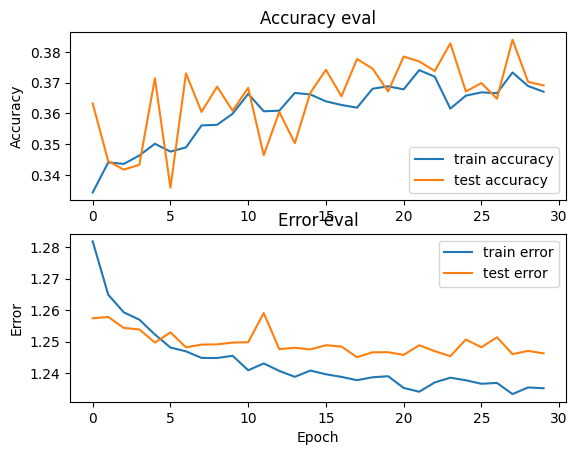

134/134 - 6s - loss: 1.2474 - accuracy: 0.3692 - 6s/epoch - 44ms/step

Test accuracy: 0.3691874146461487


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow.keras as keras


X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
model = build_model(input_shape)

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
plot_history(history)

    # evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)
